In [1]:
from fbprophet import Prophet
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
weather_data=pd.read_csv(r"C:\Users\User\Desktop\ml\Univarient-Time-series-analysis-for-weather-prediction-using-Prophet-library-main\Univarient-Time-series-analysis-for-weather-prediction-using-Prophet-library-main\dataset/weather_forecast.csv")

In [3]:
weather_data.head()

,datetime_utc,_conds,_dewptm,_fog,_hail,_heatindexm,_hum,_precipm,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wdire,_wgustm,_windchillm,_wspdm
0,19961101-11:00,Smoke,9.0,0,0,NaN,27.0,NaN,1010.0,0,0,30.0,0,0,5.0,280.0,West,NaN,NaN,7.4
1,19961101-12:00,Smoke,10.0,0,0,NaN,32.0,NaN,-9999.0,0,0,28.0,0,0,NaN,0.0,North,NaN,NaN,NaN
2,19961101-13:00,Smoke,11.0,0,0,NaN,44.0,NaN,-9999.0,0,0,24.0,0,0,NaN,0.0,North,NaN,NaN,NaN
3,19961101-14:00,Smoke,10.0,0,0,NaN,41.0,NaN,1010.0,0,0,24.0,0,0,2.0,0.0,North,NaN,NaN,NaN
4,19961101-16:00,Smoke,11.0,0,0,NaN,47.0,NaN,1011.0,0,0,23.0,0,0,1.2,0.0,North,NaN,NaN,0.0


In [4]:
weather_data.tail()

,datetime_utc,_conds,_dewptm,_fog,_hail,_heatindexm,_hum,_precipm,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wdire,_wgustm,_windchillm,_wspdm
100985,20170424-06:00,Haze,17.0,0,0,NaN,25.0,NaN,1005.0,0,0,34.0,0,0,4.0,320.0,NW,NaN,NaN,11.1
100986,20170424-09:00,Haze,14.0,0,0,NaN,16.0,NaN,1003.0,0,0,38.0,0,0,4.0,320.0,NW,NaN,NaN,22.2
100987,20170424-12:00,Haze,12.0,0,0,NaN,14.0,NaN,1002.0,0,0,36.0,0,0,4.0,270.0,West,NaN,NaN,18.5
100988,20170424-15:00,Haze,15.0,0,0,NaN,27.0,NaN,1004.0,0,0,32.0,0,0,2.0,320.0,NW,NaN,NaN,3.7
100989,20170424-18:00,Haze,15.0,0,0,NaN,30.0,NaN,1005.0,0,0,30.0,0,0,2.0,320.0,NW,NaN,NaN,3.7


In [5]:
weather_data.dtypes

datetime_utc     object
 _conds          object
 _dewptm        float64
 _fog             int64
 _hail            int64
 _heatindexm    float64
 _hum           float64
 _precipm       float64
 _pressurem     float64
 _rain            int64
 _snow            int64
 _tempm         float64
 _thunder         int64
 _tornado         int64
 _vism          float64
 _wdird         float64
 _wdire          object
 _wgustm        float64
 _windchillm    float64
 _wspdm         float64
dtype: object

In [6]:

weather_data['datetime_utc'] = pd.to_datetime(weather_data['datetime_utc'])

In [7]:
weather_data.set_index('datetime_utc', inplace= True)
weather_data

,_conds,_dewptm,_fog,_hail,_heatindexm,_hum,_precipm,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wdire,_wgustm,_windchillm,_wspdm
datetime_utc,,,,,,,,,,,,,,,,,,,
1996-11-01 11:00:00,Smoke,9.0,0,0,NaN,27.0,NaN,1010.0,0,0,30.0,0,0,5.0,280.0,West,NaN,NaN,7.4
1996-11-01 12:00:00,Smoke,10.0,0,0,NaN,32.0,NaN,-9999.0,0,0,28.0,0,0,NaN,0.0,North,NaN,NaN,NaN
1996-11-01 13:00:00,Smoke,11.0,0,0,NaN,44.0,NaN,-9999.0,0,0,24.0,0,0,NaN,0.0,North,NaN,NaN,NaN
1996-11-01 14:00:00,Smoke,10.0,0,0,NaN,41.0,NaN,1010.0,0,0,24.0,0,0,2.0,0.0,North,NaN,NaN,NaN
1996-11-01 16:00:00,Smoke,11.0,0,0,NaN,47.0,NaN,1011.0,0,0,23.0,0,0,1.2,0.0,North,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-04-24 06:00:00,Haze,17.0,0,0,NaN,25.0,NaN,1005.0,0,0,34.0,0,0,4.0,320.0,NW,NaN,NaN,11.1
2017-04-24 09:00:00,Haze,14.0,0,0,NaN,16.0,NaN,1003.0,0,0,38.0,0,0,4.0,320.0,NW,NaN,NaN,22.2
2017-04-24 12:00:00,Haze,12.0,0,0,NaN,14.0,NaN,1002.0,0,0,36.0,0,0,4.0,270.0,West,NaN,NaN,18.5


In [8]:
weather_data =weather_data.resample('D').mean()

In [9]:
weather_data 

,_dewptm,_fog,_hail,_heatindexm,_hum,_precipm,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wgustm,_windchillm,_wspdm
datetime_utc,,,,,,,,,,,,,,,,,
1996-11-01,11.666667,0.0,0.0,NaN,52.916667,NaN,-2659.666667,0.0,0.0,22.333333,0.0,0.0,2.250000,23.333333,NaN,NaN,2.466667
1996-11-02,10.458333,0.0,0.0,NaN,48.625000,NaN,1009.833333,0.0,0.0,22.916667,0.0,0.0,3.476190,106.666667,NaN,NaN,8.028571
1996-11-03,12.041667,0.0,0.0,26.80,55.958333,NaN,1010.500000,0.0,0.0,21.791667,0.0,0.0,2.286364,106.666667,NaN,NaN,4.804545
1996-11-04,10.222222,0.0,0.0,27.50,48.055556,NaN,1011.333333,0.0,0.0,22.722222,0.0,0.0,2.326667,55.555556,NaN,NaN,1.964706
1996-11-05,8.200000,0.0,0.0,NaN,29.400000,NaN,1011.800000,0.0,0.0,27.800000,0.0,0.0,3.900000,208.000000,NaN,NaN,10.020000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-04-20,16.750000,0.0,0.0,NaN,27.500000,NaN,998.625000,0.0,0.0,34.500000,0.0,0.0,2.500000,216.666667,NaN,NaN,5.562500
2017-04-21,21.500000,0.0,0.0,NaN,39.375000,NaN,999.875000,0.0,0.0,34.250000,0.0,0.0,2.000000,92.500000,NaN,NaN,6.962500
2017-04-22,20.400000,0.0,0.0,38.05,40.900000,NaN,1001.600000,0.0,0.0,32.900000,0.2,0.0,1.950000,113.750000,NaN,NaN,8.890000


In [10]:

weather_data = weather_data[[' _tempm' ]]

In [11]:
weather_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7480 entries, 1996-11-01 to 2017-04-24
Freq: D
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0    _tempm  7336 non-null   float64
dtypes: float64(1)
memory usage: 116.9 KB


In [12]:
weather_data.isnull().any()

 _tempm    True
dtype: bool

In [13]:
weather_data.reset_index(inplace=True)

In [14]:

weather_data[' _tempm'].fillna(weather_data[' _tempm'].mean(), inplace=True)

c:\users\user\anaconda3\envs\prophetenv\lib\site-packages\pandas\core\series.py:4469: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [15]:

weather_data.rename(columns = {'datetime_utc':'ds',' _tempm':'y'}, inplace = True)

c:\users\user\anaconda3\envs\prophetenv\lib\site-packages\pandas\core\frame.py:4449: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [16]:
weather_data.head()

,ds,y
0,1996-11-01,22.333333
1,1996-11-02,22.916667
2,1996-11-03,21.791667
3,1996-11-04,22.722222
4,1996-11-05,27.800000


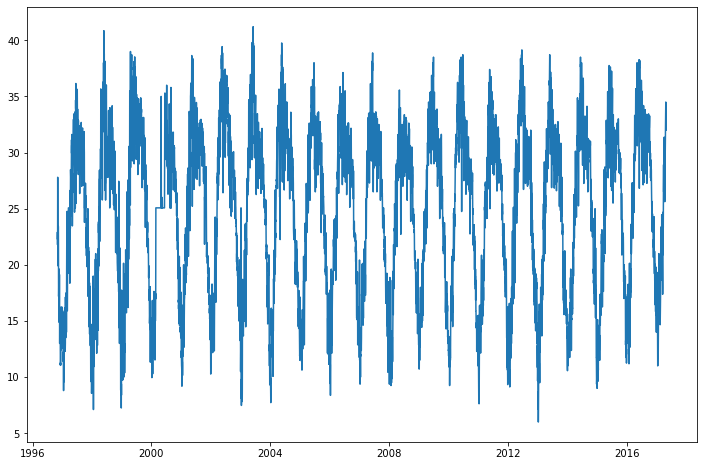

In [17]:
plt.figure(figsize=(12,8))
plt.plot(weather_data.set_index(["ds"]))

# MODEL BUILDING


# MODEL FITTING

In [18]:
model = Prophet()
model.fit(weather_data)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


# Making Future Predictions

In [19]:
future = model.make_future_dataframe(periods=365,freq="D")
future.tail()

,ds
7840,2018-04-20
7841,2018-04-21
7842,2018-04-22
7843,2018-04-23
7844,2018-04-24


In [20]:

future.head()

,ds
0,1996-11-01
1,1996-11-02
2,1996-11-03
3,1996-11-04
4,1996-11-05


# Obtaining the Forecasts

In [21]:
forecast = model.predict(future)

In [22]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1996-11-01,23.548327,18.202398,24.408241,23.548327,23.548327,-2.256430,-2.256430,-2.256430,-0.062911,-0.062911,-0.062911,-2.193519,-2.193519,-2.193519,0.0,0.0,0.0,21.291897
1,1996-11-02,23.550030,18.112963,24.294135,23.550030,23.550030,-2.361152,-2.361152,-2.361152,0.003314,0.003314,0.003314,-2.364466,-2.364466,-2.364466,0.0,0.0,0.0,21.188877
2,1996-11-03,23.551732,18.019584,24.089507,23.551732,23.551732,-2.547523,-2.547523,-2.547523,-0.011386,-0.011386,-0.011386,-2.536137,-2.536137,-2.536137,0.0,0.0,0.0,21.004209
3,1996-11-04,23.553435,17.595214,24.102860,23.553435,23.553435,-2.716263,-2.716263,-2.716263,-0.007156,-0.007156,-0.007156,-2.709107,-2.709107,-2.709107,0.0,0.0,0.0,20.837171
4,1996-11-05,23.555137,17.599234,23.693518,23.555137,23.555137,-2.905711,-2.905711,-2.905711,-0.021819,-0.021819,-0.021819,-2.883892,-2.883892,-2.883892,0.0,0.0,0.0,20.649426


In [23]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
7840,2018-04-20,32.516162,29.304155,35.862865
7841,2018-04-21,32.727015,29.569041,35.781340
7842,2018-04-22,32.856243,29.792310,36.015241
7843,2018-04-23,33.003799,29.843533,36.124466
7844,2018-04-24,33.131855,30.108290,36.201029


In [24]:

forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
0,1996-11-01,21.291897,18.202398,24.408241
1,1996-11-02,21.188877,18.112963,24.294135
2,1996-11-03,21.004209,18.019584,24.089507
3,1996-11-04,20.837171,17.595214,24.102860
4,1996-11-05,20.649426,17.599234,23.693518


# Plotting the Forecasts

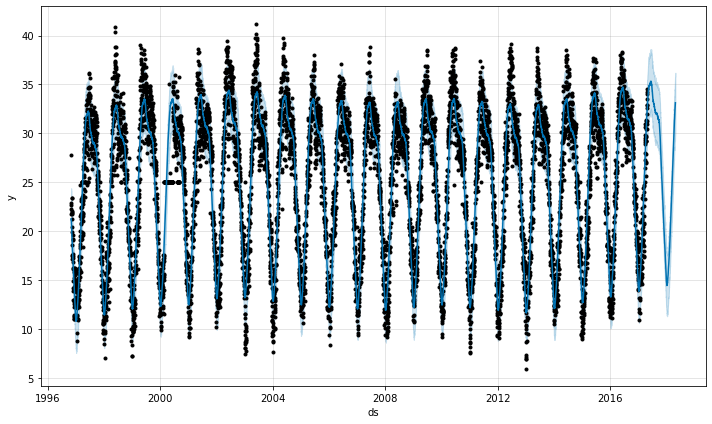

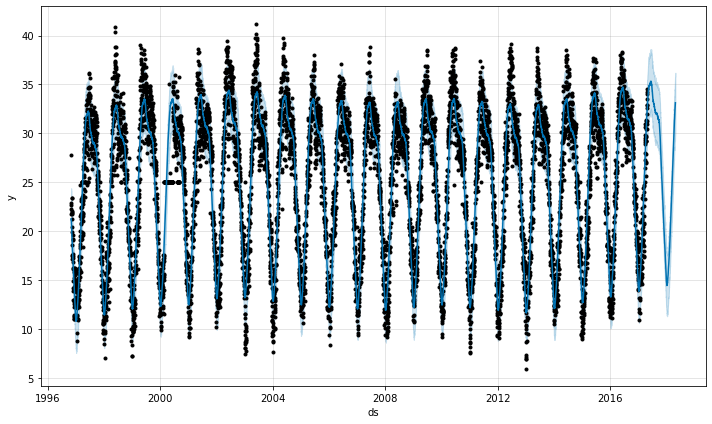

In [25]:
model.plot(forecast)

# Plotting the Forecast Components

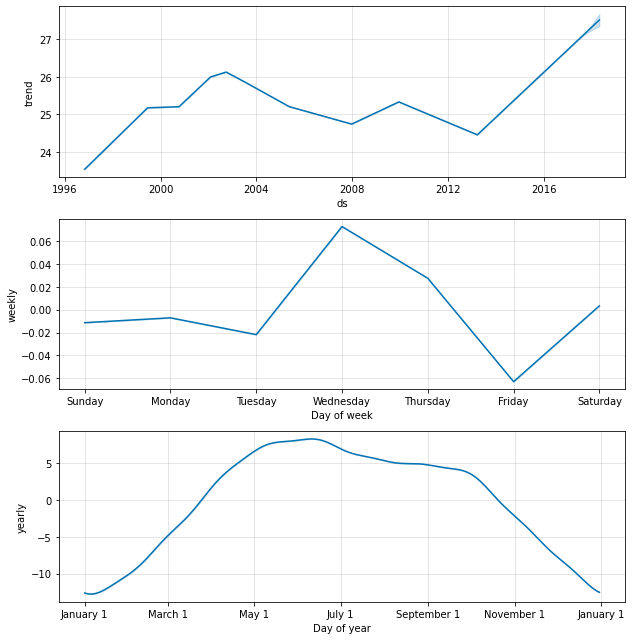

In [26]:

fig = model.plot_components(forecast)

# Cross Validation

In [27]:
from fbprophet.diagnostics import cross_validation
df_cv = cross_validation(model, initial='730 days', period='180 days', horizon = '365 days')
df_cv.head()

INFO:fbprophet:Making 36 forecasts with cutoffs between 1999-01-24 00:00:00 and 2016-04-24 00:00:00


  0%|          | 0/36 [00:00<?, ?it/s]

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,1999-01-25,13.713828,10.732797,16.829294,13.20,1999-01-24
1,1999-01-26,13.854783,10.829838,16.839780,10.00,1999-01-24
2,1999-01-27,14.035737,10.815123,17.173482,17.75,1999-01-24
3,1999-01-28,14.109067,11.047434,17.225714,11.75,1999-01-24
4,1999-01-29,13.880910,10.855265,16.984271,11.20,1999-01-24


# Obtaining the Performance Metrics

In [28]:
from fbprophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,coverage
0,37 days,6.832432,2.613892,2.063566,0.100788,0.073925,0.794521
1,38 days,6.830202,2.613465,2.069643,0.100959,0.074071,0.792237
2,39 days,6.861443,2.619436,2.078504,0.101068,0.074356,0.788052
3,40 days,6.904733,2.627686,2.084213,0.101068,0.074685,0.785388
4,41 days,7.009090,2.647469,2.092755,0.100863,0.074685,0.781583


# Visualizing Performance Metrics

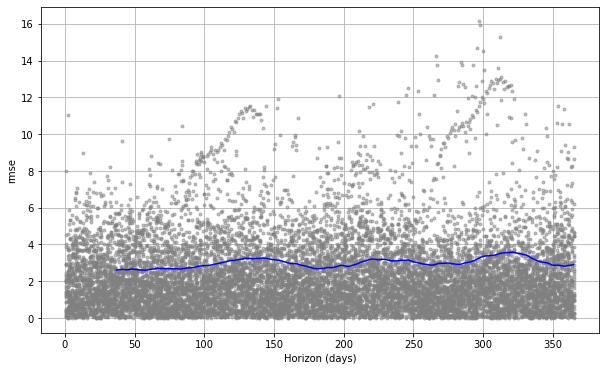

In [29]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='rmse')

# 
# Saving the model file

In [30]:
import pickle
pickle.dump( model, open( "weather_prediction.pickle", "wb" ) )